In [35]:
import numpy as np
import pandas as pd
import string
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv('/content/spam.csv', encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'message']
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [37]:
# Clean text function
def clean_text(text):
    text = text.lower()
    text = re.sub(f'[{string.punctuation}]', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.strip()
    return text
df['clean_message'] = df['message'].apply(clean_text)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    df['clean_message'], df['label'], test_size=0.2, random_state=42
)

In [39]:
vectorizer = TfidfVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

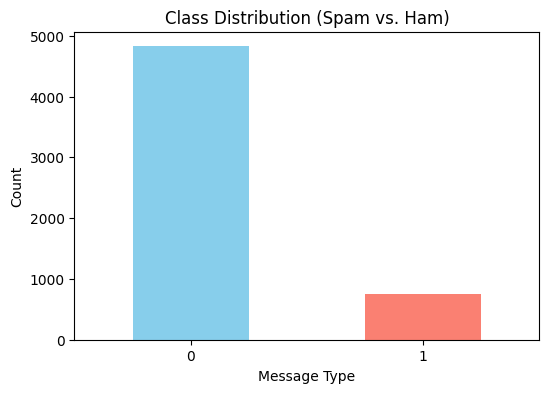

In [40]:

# Visualize class distribution
plt.figure(figsize=(6, 4))
df['label'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution (Spam vs. Ham)')
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

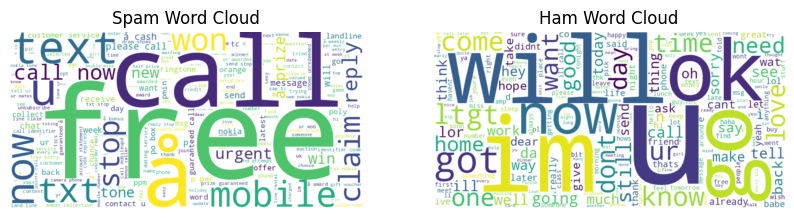

In [26]:
from wordcloud import WordCloud
spam_words = ' '.join(df[df['label'] == 1]['clean_message'])
ham_words = ' '.join(df[df['label'] == 0]['clean_message'])
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_words)
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_words)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Spam Word Cloud')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Ham Word Cloud')
plt.axis('off')
plt.show()

In [22]:
# 4. Model Training and Evaluation
models = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(kernel='linear')
}


==== Naive Bayes Results ====
Train Accuracy: 97.85%
Test Accuracy: 96.86%


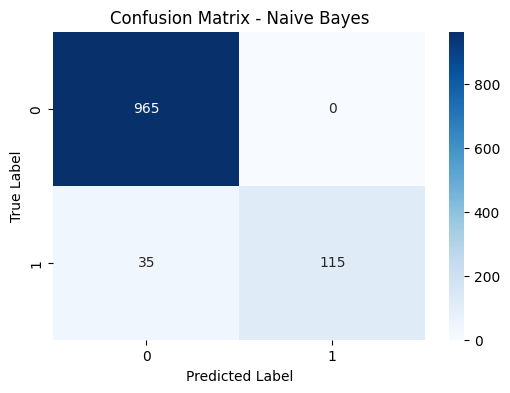

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.77      0.87       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.93      1115
weighted avg       0.97      0.97      0.97      1115


==== Naive Bayes Sample Predictions ====

-- Train Dataset --
Sample 1: Actual = Ham, Predicted = Ham
Sample 2: Actual = Spam, Predicted = Spam
Sample 3: Actual = Ham, Predicted = Ham
Sample 4: Actual = Ham, Predicted = Ham
Sample 5: Actual = Spam, Predicted = Spam
Sample 6: Actual = Ham, Predicted = Ham
Sample 7: Actual = Spam, Predicted = Ham
Sample 8: Actual = Ham, Predicted = Ham
Sample 9: Actual = Ham, Predicted = Ham
Sample 10: Actual = Ham, Predicted = Ham

-- Test Dataset --
Sample 1: Actual = Ham, Predicted = Ham
Sample 2: Actual = Ham, Predicted = Ham
Sample 3: Actual = Spam, Predicted = Ham
Sample 4: Actual = Ham, Predicted = Ham
Sample 5: Actual = Spam

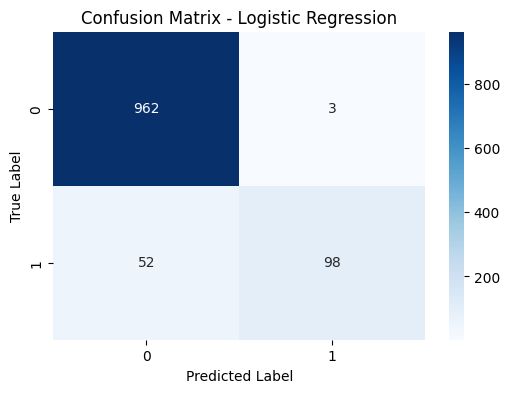

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.97      0.65      0.78       150

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115


==== Logistic Regression Sample Predictions ====

-- Train Dataset --
Sample 1: Actual = Ham, Predicted = Ham
Sample 2: Actual = Spam, Predicted = Ham
Sample 3: Actual = Ham, Predicted = Ham
Sample 4: Actual = Ham, Predicted = Ham
Sample 5: Actual = Spam, Predicted = Spam
Sample 6: Actual = Ham, Predicted = Ham
Sample 7: Actual = Spam, Predicted = Ham
Sample 8: Actual = Ham, Predicted = Ham
Sample 9: Actual = Ham, Predicted = Ham
Sample 10: Actual = Ham, Predicted = Ham

-- Test Dataset --
Sample 1: Actual = Ham, Predicted = Ham
Sample 2: Actual = Ham, Predicted = Ham
Sample 3: Actual = Spam, Predicted = Ham
Sample 4: Actual = Ham, Predicted = Ham
Sample 5: Actual

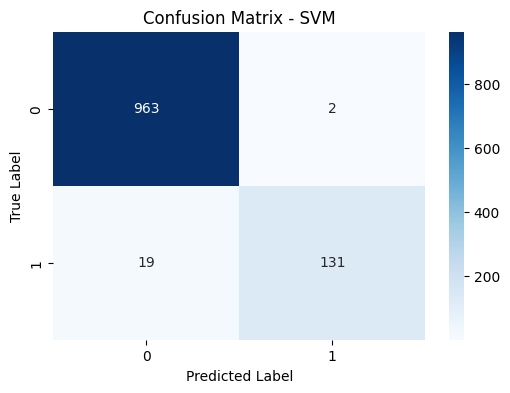

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.98      0.87      0.93       150

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115


==== SVM Sample Predictions ====

-- Train Dataset --
Sample 1: Actual = Ham, Predicted = Ham
Sample 2: Actual = Spam, Predicted = Spam
Sample 3: Actual = Ham, Predicted = Ham
Sample 4: Actual = Ham, Predicted = Ham
Sample 5: Actual = Spam, Predicted = Spam
Sample 6: Actual = Ham, Predicted = Ham
Sample 7: Actual = Spam, Predicted = Spam
Sample 8: Actual = Ham, Predicted = Ham
Sample 9: Actual = Ham, Predicted = Ham
Sample 10: Actual = Ham, Predicted = Ham

-- Test Dataset --
Sample 1: Actual = Ham, Predicted = Ham
Sample 2: Actual = Ham, Predicted = Ham
Sample 3: Actual = Spam, Predicted = Ham
Sample 4: Actual = Ham, Predicted = Ham
Sample 5: Actual = Spam, Predi

In [24]:
for name, model in models.items():
    model.fit(X_train_vec, y_train)

    # Predictions and accuracy for training data
    y_train_pred = model.predict(X_train_vec)
    train_accuracy = accuracy_score(y_train, y_train_pred) * 100

    # Predictions and accuracy for testing data
    y_test_pred = model.predict(X_test_vec)
    test_accuracy = accuracy_score(y_test, y_test_pred) * 100
    print(f'\n==== {name} Results ====')
    print(f'Train Accuracy: {train_accuracy:.2f}%')
    print(f'Test Accuracy: {test_accuracy:.2f}%')
    # Confusion Matrix Heatmap
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    print(classification_report(y_test, y_test_pred))
    print(f"\n==== {name} Sample Predictions ====")
    for dataset, X, y, predictions in [
        ("Train", X_train_vec, y_train, y_train_pred),
        ("Test", X_test_vec, y_test, y_test_pred),
    ]:
        print(f"\n-- {dataset} Dataset --")
        for i in range(10):
            index = i
            actual_label = "Spam" if y.iloc[index] == 1 else "Ham"
            predicted_label = "Spam" if predictions[index] == 1 else "Ham"
            print(
                f"Sample {i + 1}: Actual = {actual_label}, Predicted = {predicted_label}"
            )

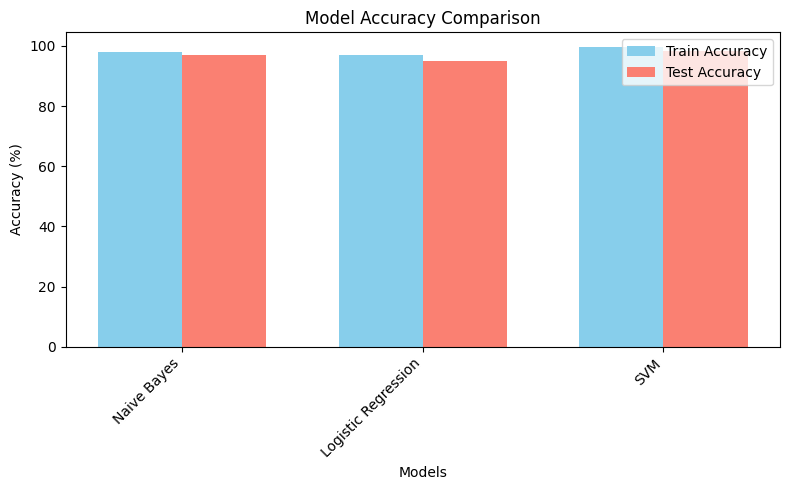

In [27]:
model_names = list(models.keys())
train_accuracies = [accuracy_score(y_train, model.predict(X_train_vec)) * 100 for model in models.values()]
test_accuracies = [accuracy_score(y_test, model.predict(X_test_vec)) * 100 for model in models.values()]
x_pos = np.arange(len(model_names))
width = 0.35
plt.figure(figsize=(8, 5))
plt.bar(x_pos - width/2, train_accuracies, width, label='Train Accuracy', color='skyblue')
plt.bar(x_pos + width/2, test_accuracies, width, label='Test Accuracy', color='salmon')
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.xticks(x_pos, model_names, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [43]:
def predict_user_input_all_models():
    user_input = input("Enter an SMS message: ")
    cleaned_input = clean_text(user_input)
    input_vec = vectorizer.transform([cleaned_input])

    for name, model in models.items():
        prediction = model.predict(input_vec)[0]
        if prediction == 1:
            print(f"{name} Prediction: Spam")
        else:
            print(f"{name} Prediction: Ham")

predict_user_input_all_models()

Enter an SMS message: "Congratulations! You've won a free prize. Click here to claim it."
Naive Bayes Prediction: Spam
Logistic Regression Prediction: Spam
SVM Prediction: Spam


In [44]:
for name, model in models.items():
    y_pred = model.predict(X_test_vec)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Final Accuracy for {name}: {accuracy * 100:.2f}%")


Final Accuracy for Naive Bayes: 96.86%
Final Accuracy for Logistic Regression: 95.07%
Final Accuracy for SVM: 98.12%
